In [16]:
import json
# Load the dictionary containing filenames and titles from the JSON file
with open('filter_data2.json', 'r') as json_file:
    data = json.load(json_file)
# Extract titles from the dictionary

In [3]:
#load model top2vec
# decider d'eliminer certains categories de documents qui ne donnent que des contenus administratif et d'organisation
# et enlever aussi des mots bruyants 
import nltk
nltk.download('punkt')
import spacy
from nltk.corpus import stopwords
from collections import defaultdict
count = 0

filter_doc = []#"actes-de-la-soci", "liste-des-membres", "liste-générale-des-membres", "procès-verbaux", "procès-verbal"] 
#               "rapport-financier", "rapport-du-trésorier" ]

corpus_man_filtered=[]
len_dict = {}

for article in data:
    all_sub_text_not_found = True
    text = article["FolderName"]
    doc = article["TextData"]
    for elim in filter_doc:
        if elim in text:
            if elim in len_dict:
                len_dict[elim] += article["Words"]/63453
            else:
                len_dict[elim] = article["Words"]/63453
            all_sub_text_not_found = False
    if all_sub_text_not_found:
        corpus_man_filtered.append(doc)
        
# Load the French language model
nlp = spacy.load("fr_core_news_sm")

# Get the French stopwords
french_stopwords_spacy = nlp.Defaults.stop_words
# Download the French stopwords dataset
nltk.download("stopwords")
# Load the nltk stopwords
fr_stopwords = set(stopwords.words("french"))
en_stopwords = set(stopwords.words("english"))

file_path = '/home/sau/Downloads/noise_word'  # Replace with the path to your file
noise_word_list = []

with open(file_path, 'r') as file:
    for line in file:
        # Remove leading and trailing whitespace and add the word to the list
        noise_word_list.append(line.strip())

for n in noise_word_list:
    fr_stopwords.add(n)
for n in en_stopwords:
    fr_stopwords.add(n)
    
i=0
preprocessed_corpus=[]
for text in corpus_man_filtered:
    words = text.split()
    filtered_words = [word.lower() for word in words 
                      if word.lower() not in fr_stopwords 
                      and word.lower() not in french_stopwords_spacy]
    preprocessed_text = " ".join(filtered_words)
    preprocessed_corpus.append(preprocessed_text)
    

[nltk_data] Downloading package punkt to /home/sau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
md.save(f'model_ngram_10_deep-learn-filter2')

In [9]:
from top2vec import Top2Vec
import multiprocessing
# Initialize Top2Vec model
mincount = 10
train_speed = 'fast-learn'
def top2vecmodel(mincount,train_speed):
    model = Top2Vec(documents=preprocessed_corpus, 
                tokenizer=lambda x: x.split(), 
                min_count=mincount,
                ngram_vocab = False,
                speed=train_speed,
                workers=(multiprocessing.cpu_count()-1)
               )
    return model
md = top2vecmodel(mincount,train_speed)
md.save(f'model_{mincount}_{train_speed}')

2023-09-13 02:29:03,975 - top2vec - INFO - Pre-processing documents for training
2023-09-13 02:29:04,163 - top2vec - INFO - Creating joint document/word embedding
2023-09-13 02:36:46,282 - top2vec - INFO - Creating lower dimension embedding of documents
2023-09-13 02:36:49,377 - top2vec - INFO - Finding dense areas of documents
2023-09-13 02:36:49,408 - top2vec - INFO - Finding topics


In [35]:
mincount = 3200
train_speed = 'learn'
model_test_param = Top2Vec(documents=preprocessed_corpus, 
            tokenizer=lambda x: x.split(), 
            min_count=mincount,
                ngram_vocab = True,
#                 split_documents = True,
            speed=train_speed,
            workers=(multiprocessing.cpu_count() )
           )
model_test_param.save(f'model_ngram_{mincount}_{train_speed}')

2023-09-11 12:34:00,968 - top2vec - INFO - Pre-processing documents for training
2023-09-11 12:34:01,185 - top2vec - INFO - Creating joint document/word embedding
2023-09-11 12:34:29,868 - top2vec - INFO - Creating lower dimension embedding of documents
2023-09-11 12:34:31,668 - top2vec - INFO - Finding dense areas of documents
2023-09-11 12:34:31,681 - top2vec - INFO - Finding topics


In [39]:
model = Top2Vec.load(f'model_bigram_400_learn')
model.get_topic_sizes()

(array([183, 120, 118,  86,  85,  69,  42,  38,  36]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

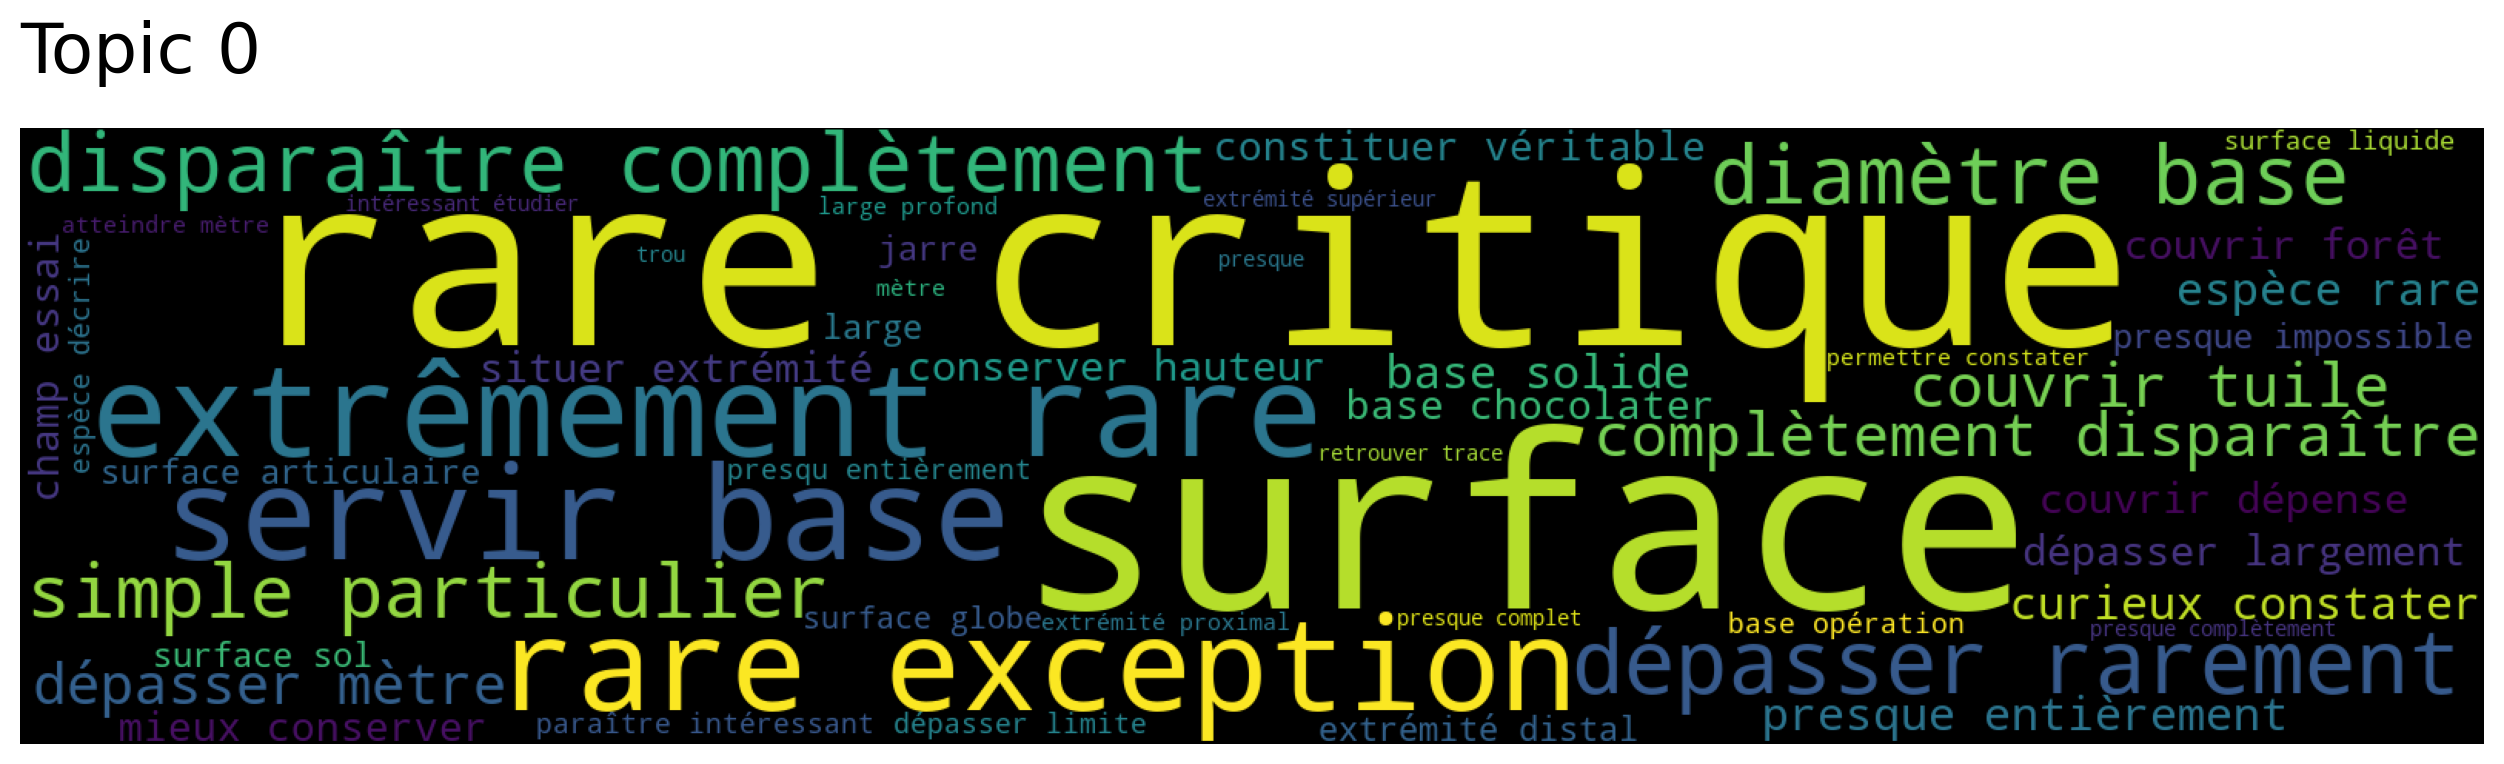

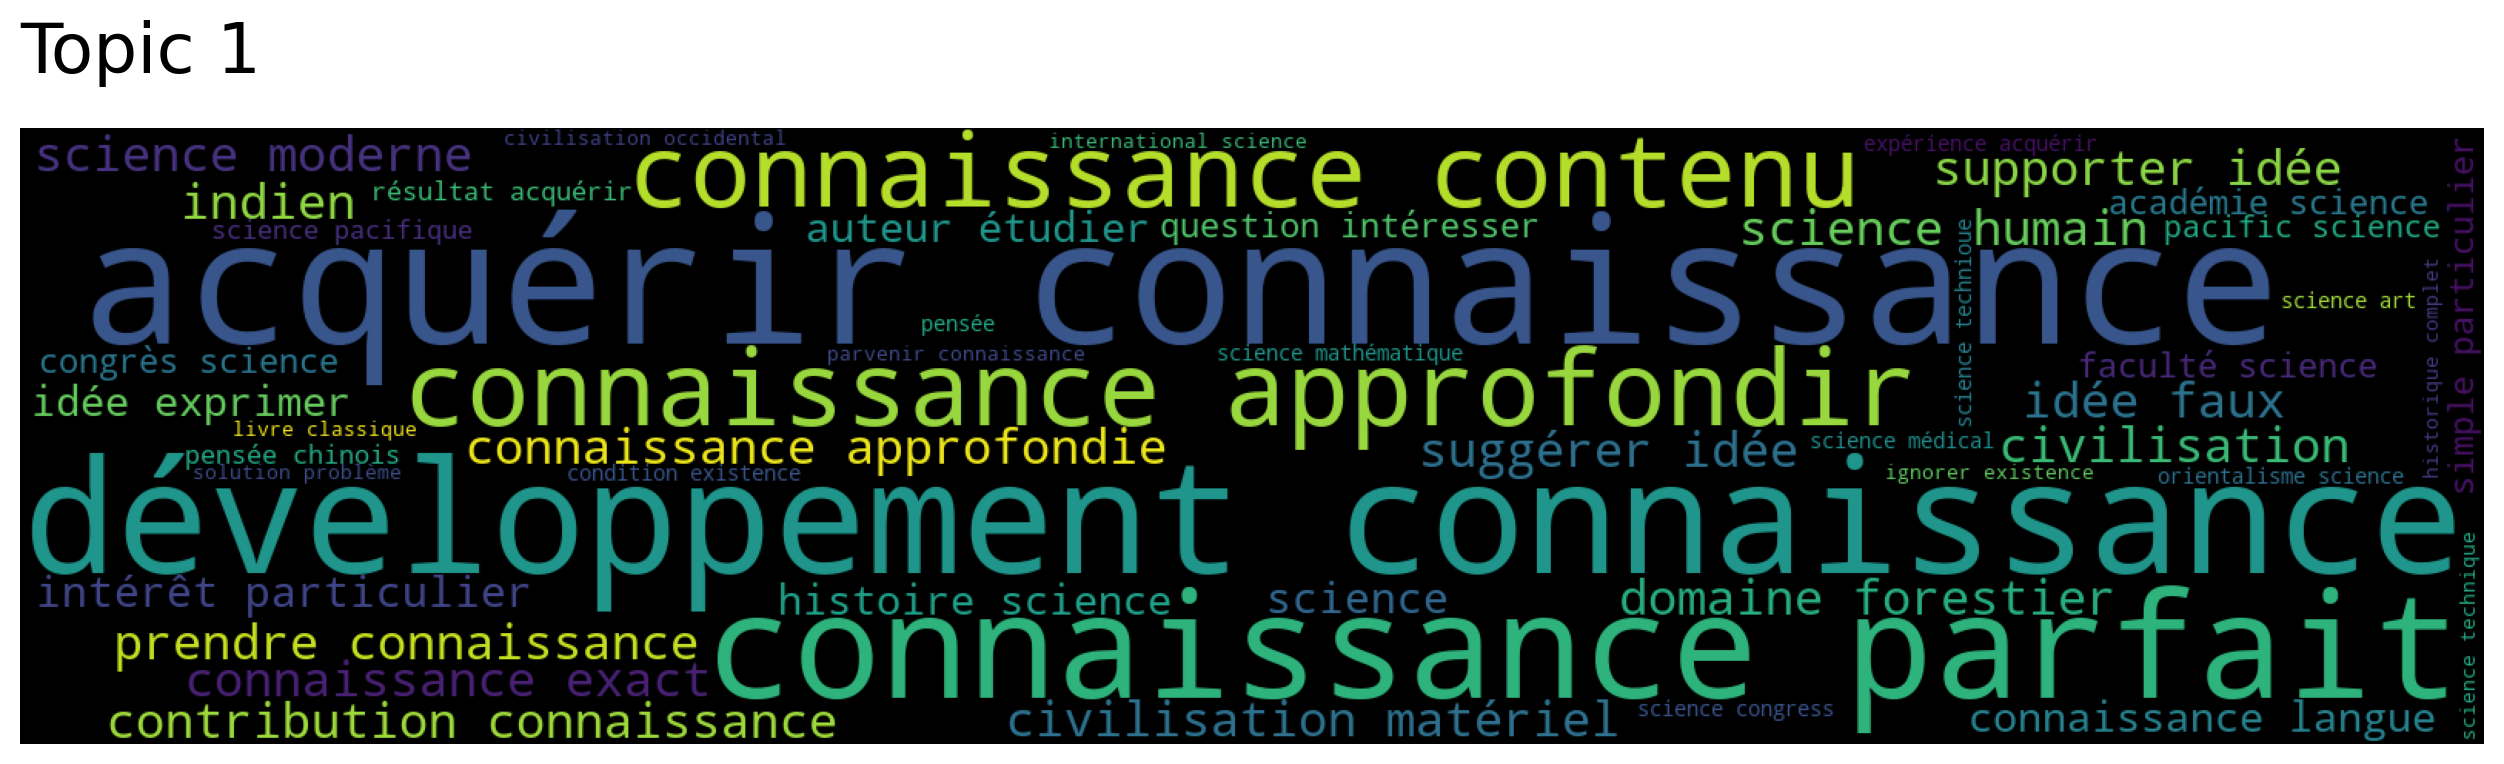

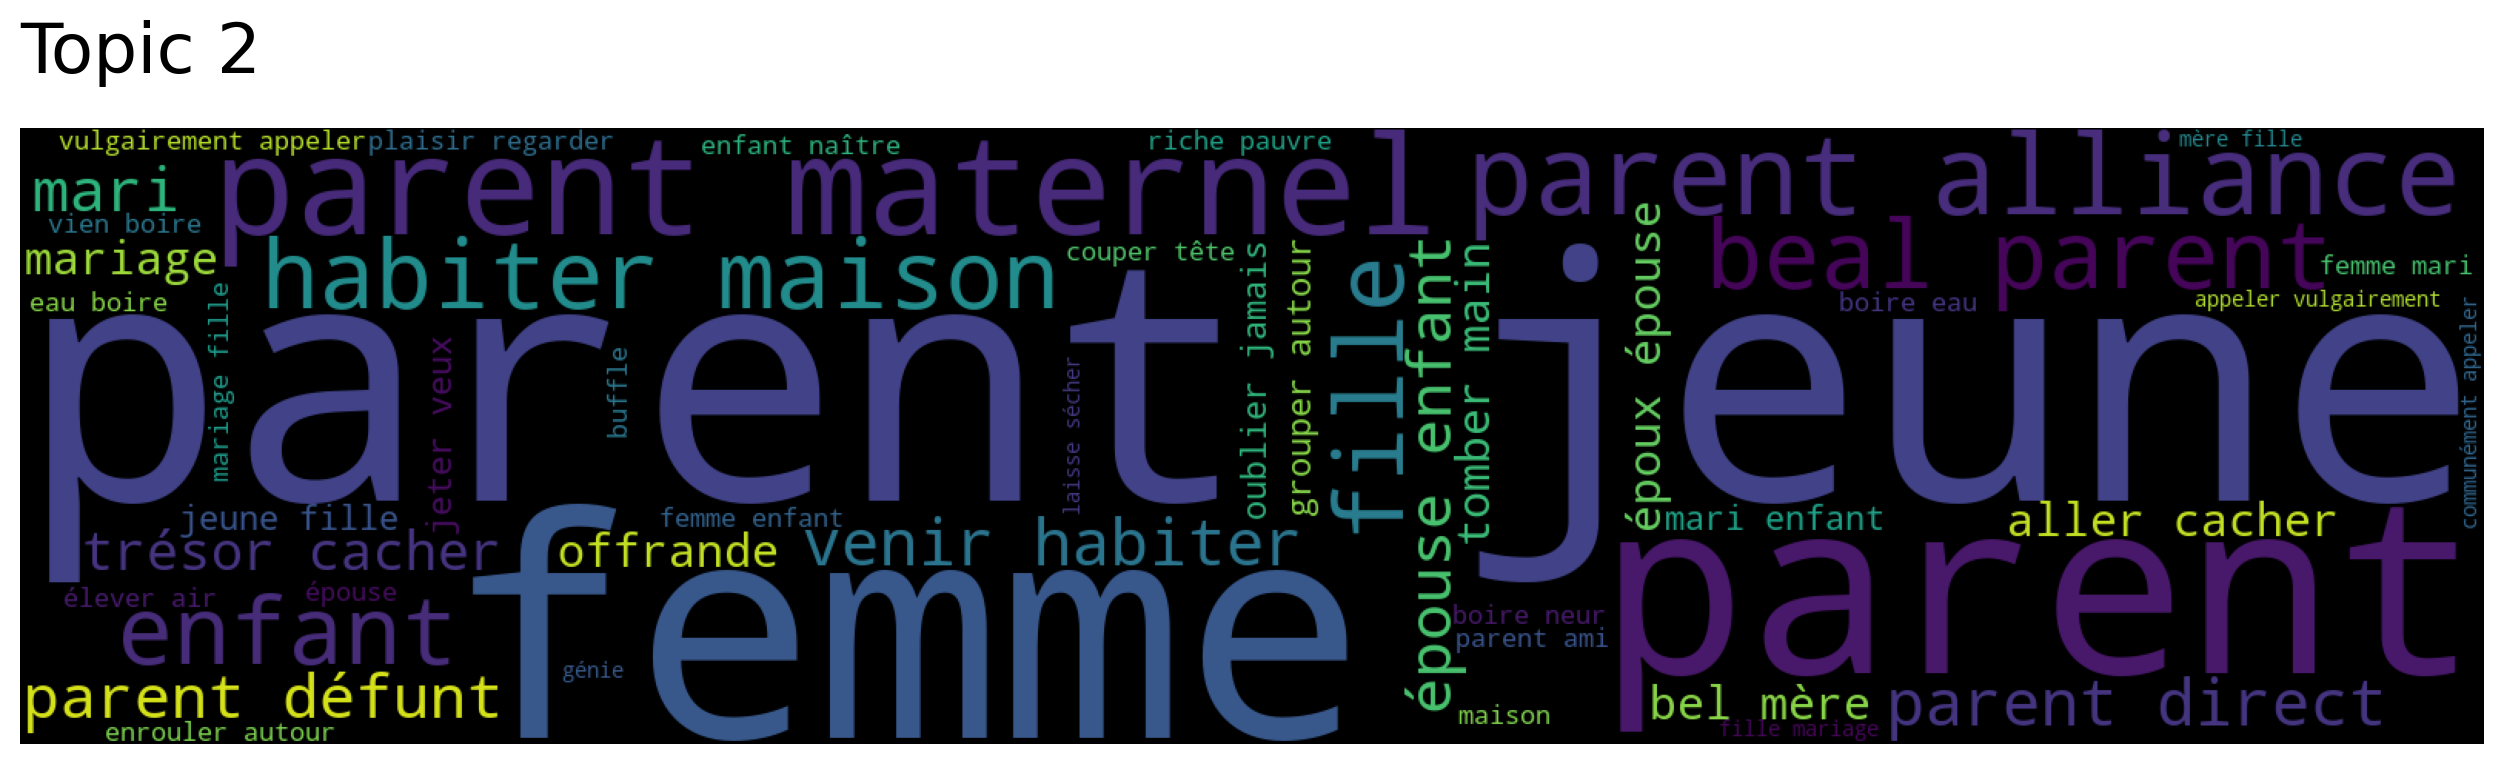

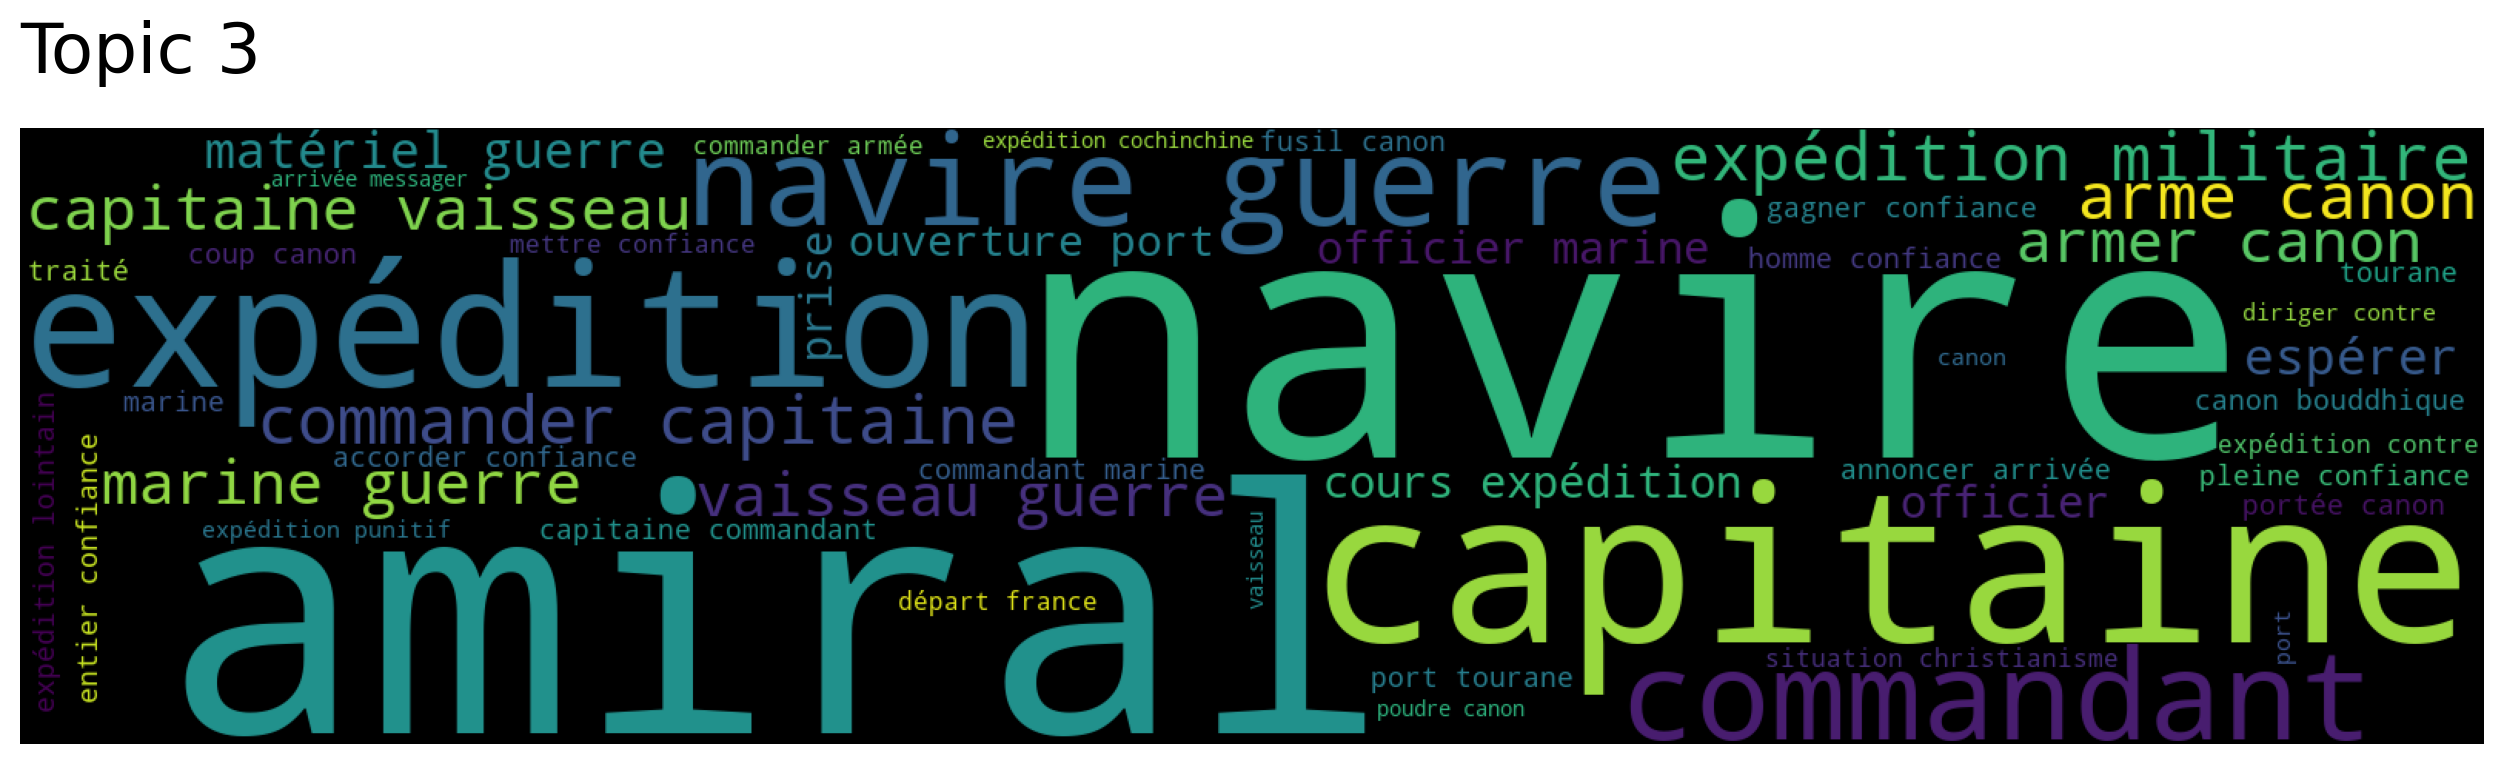

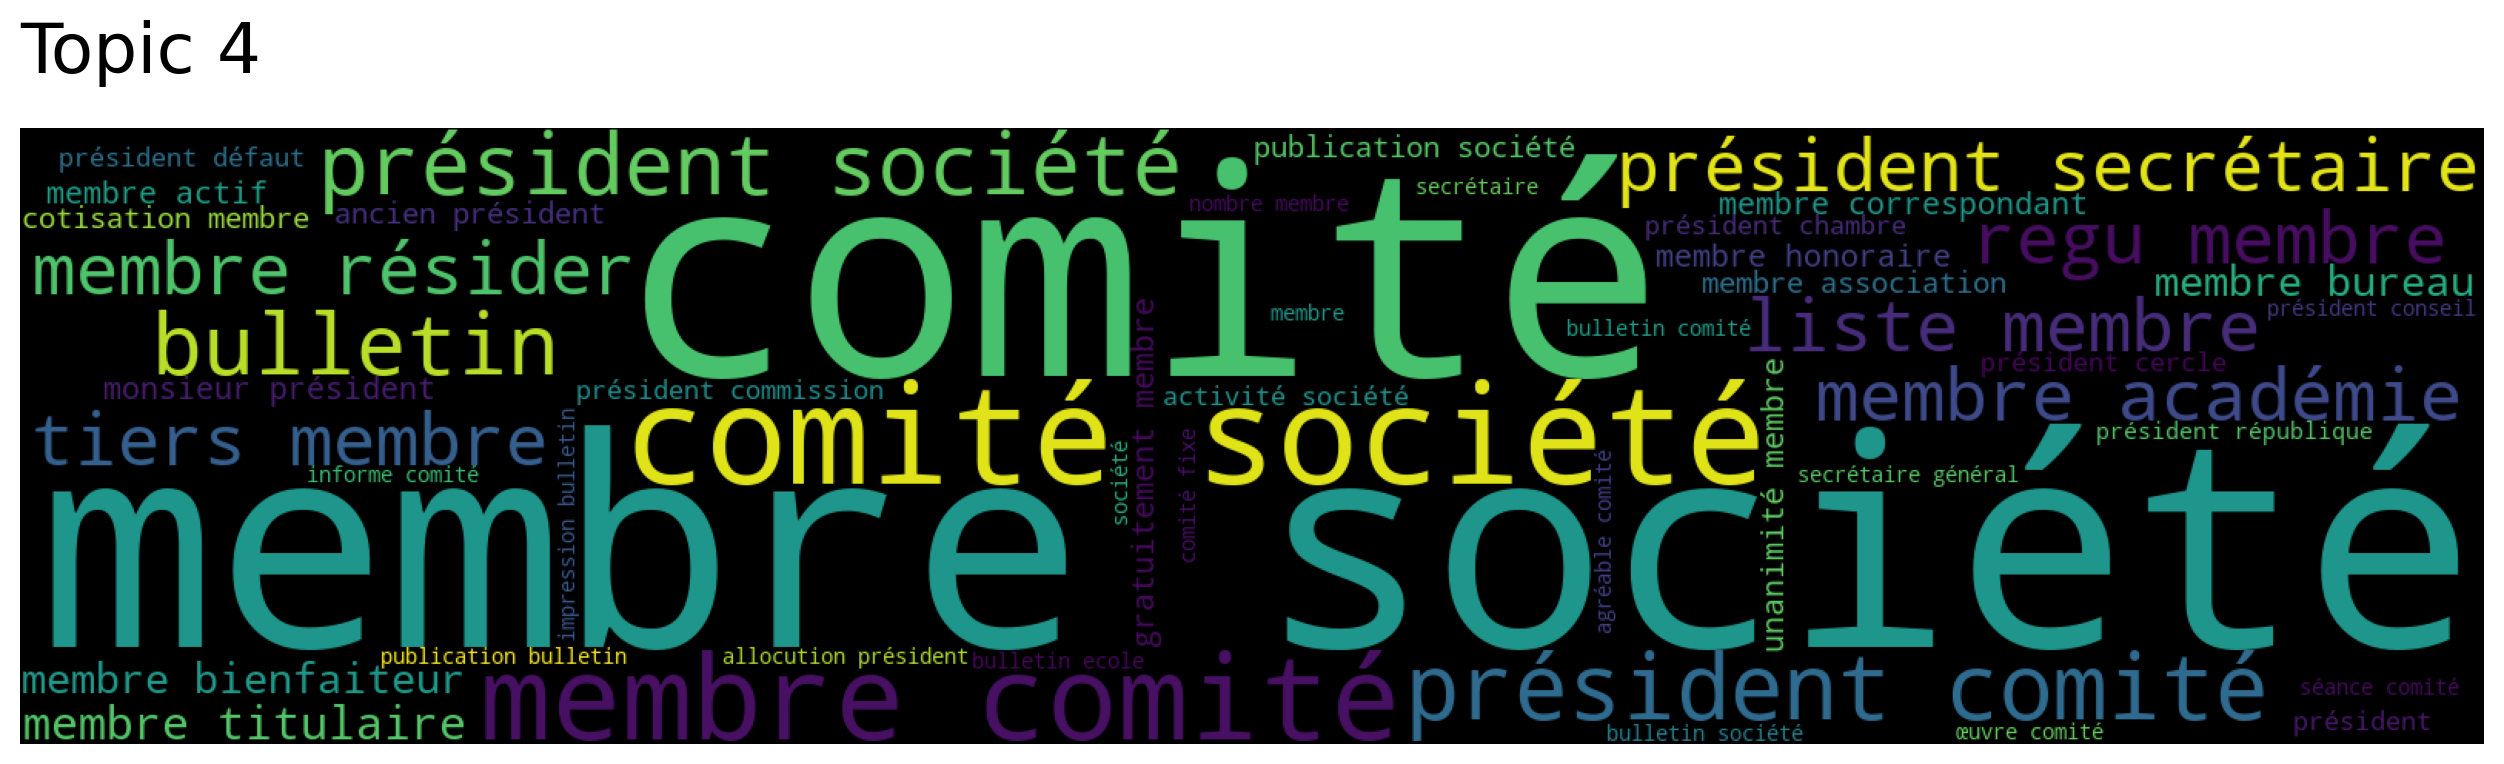

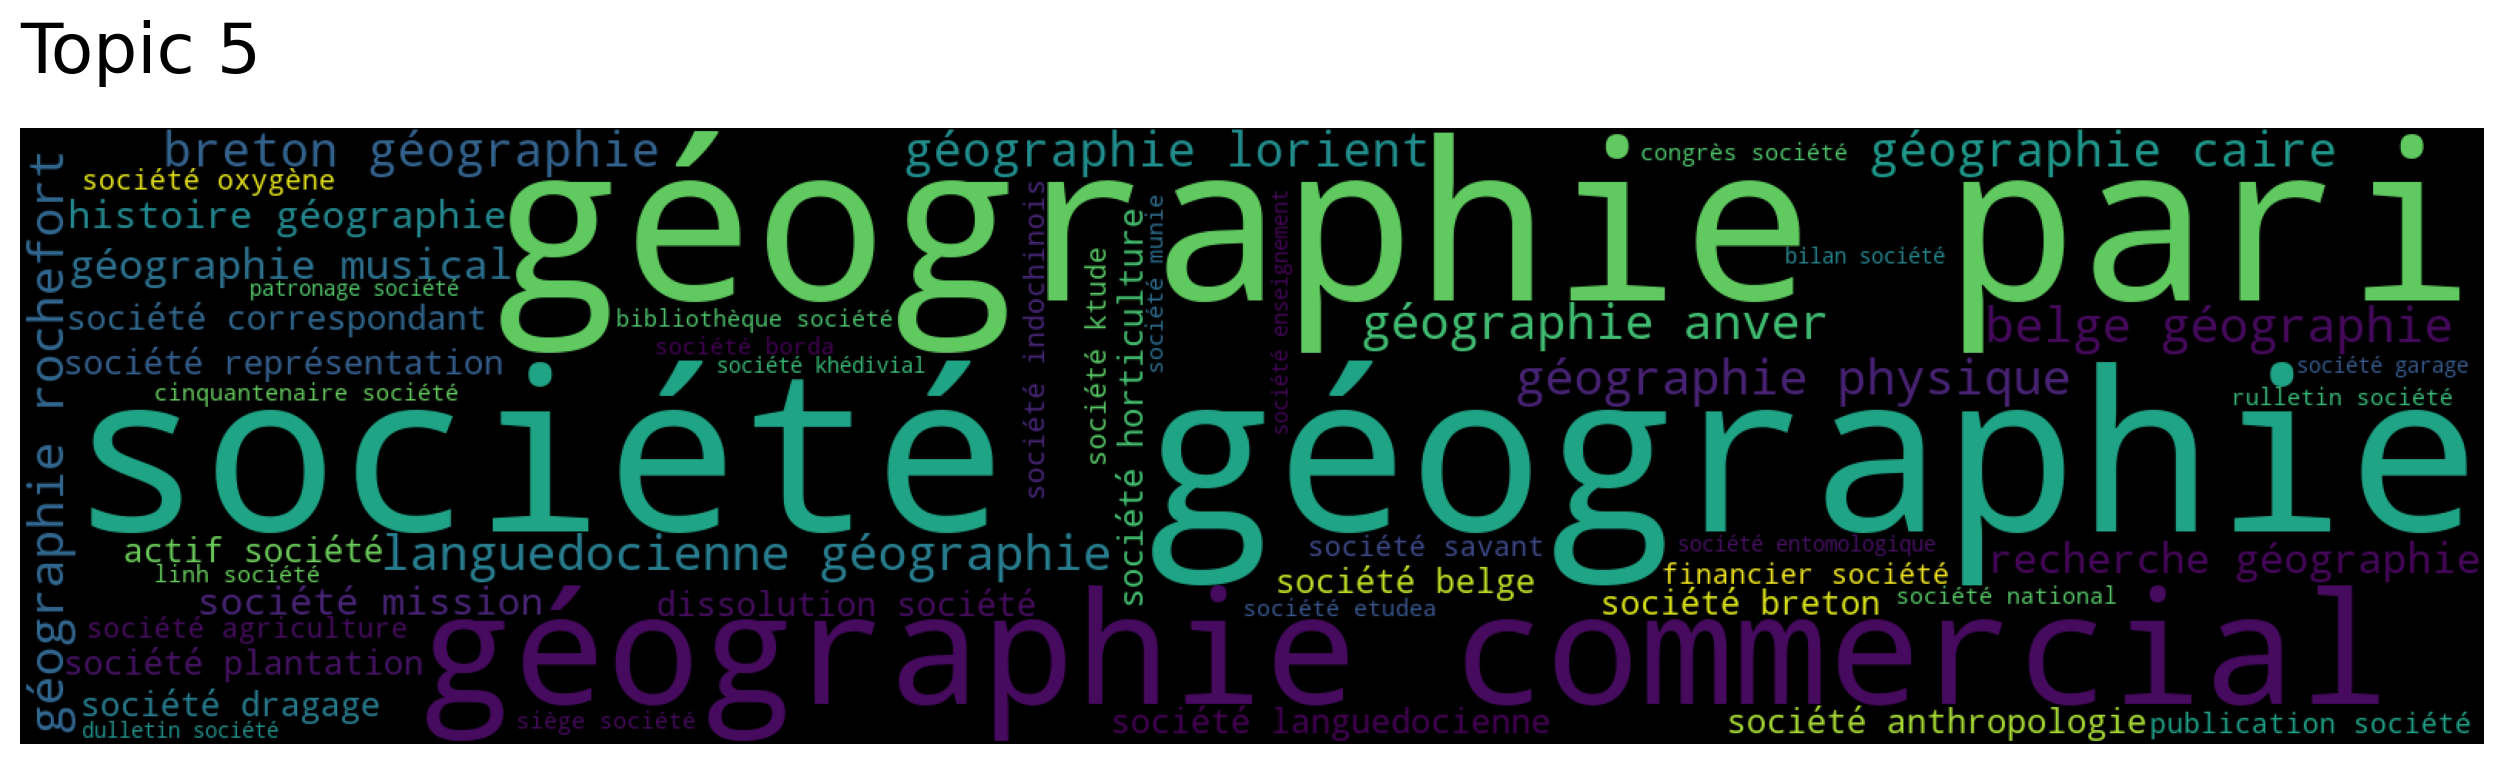

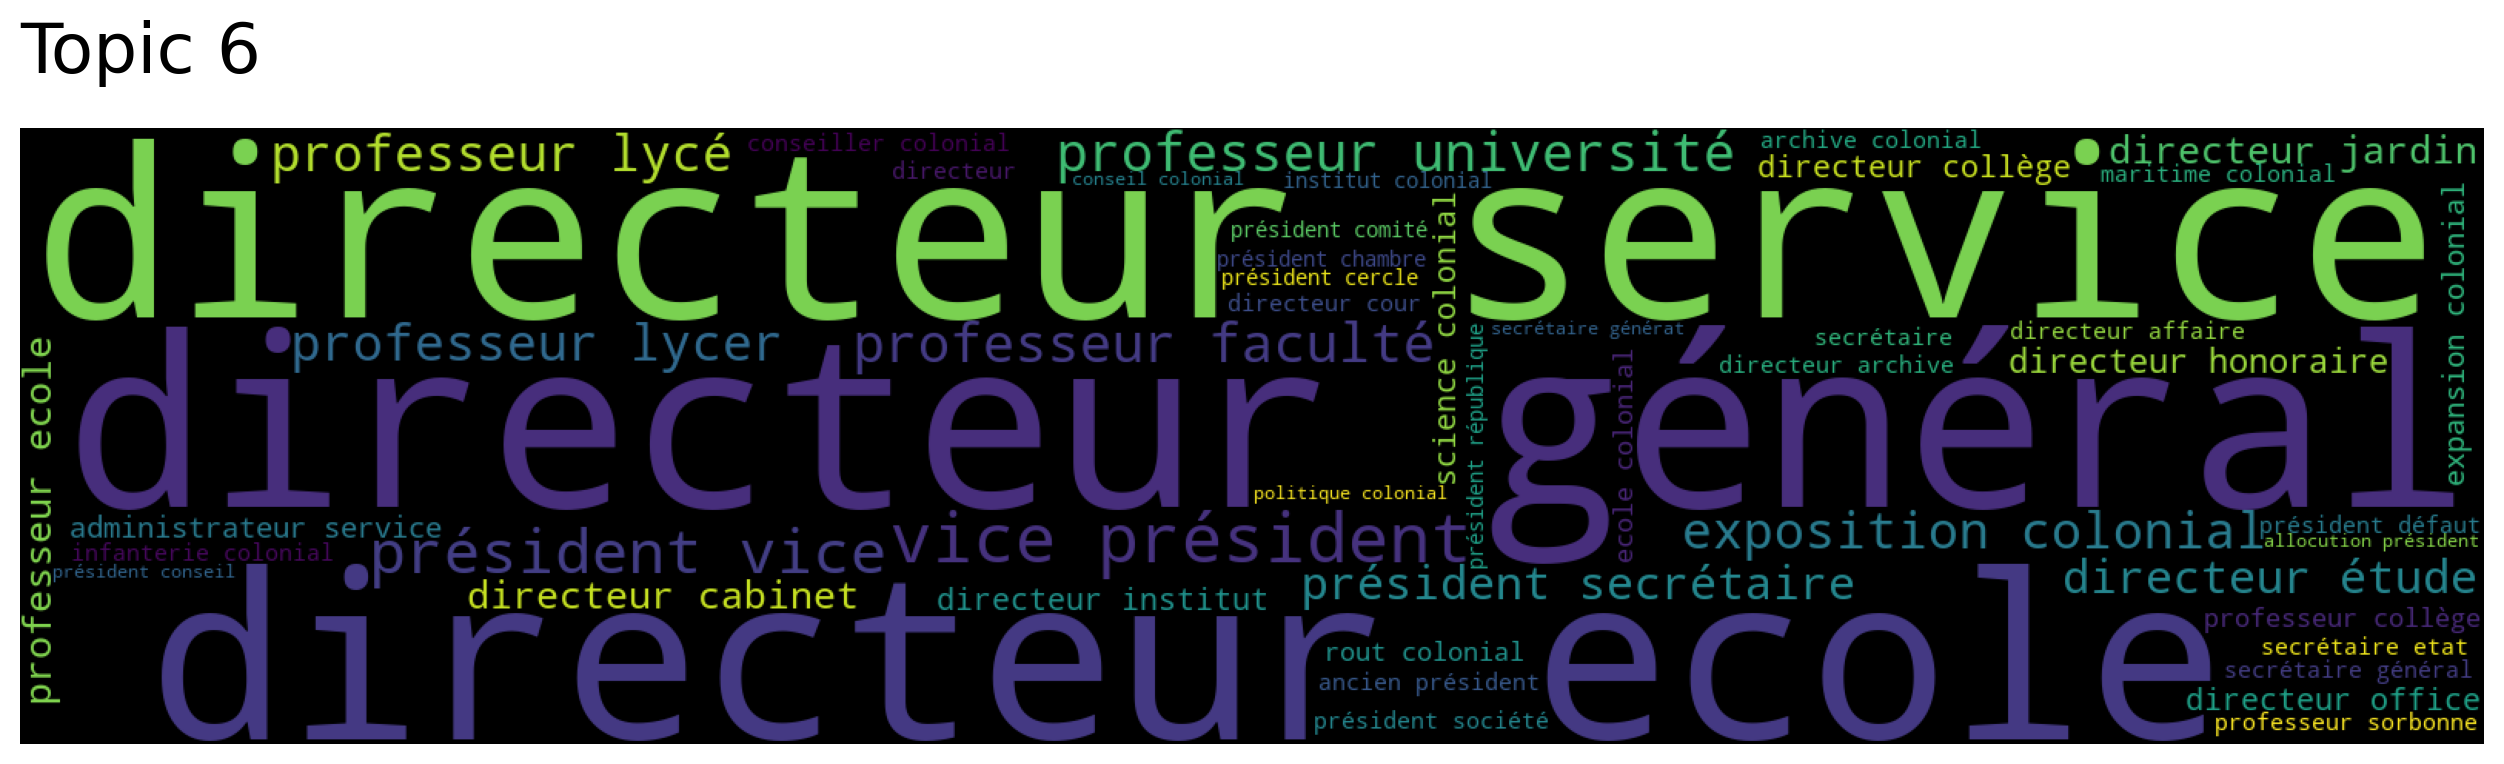

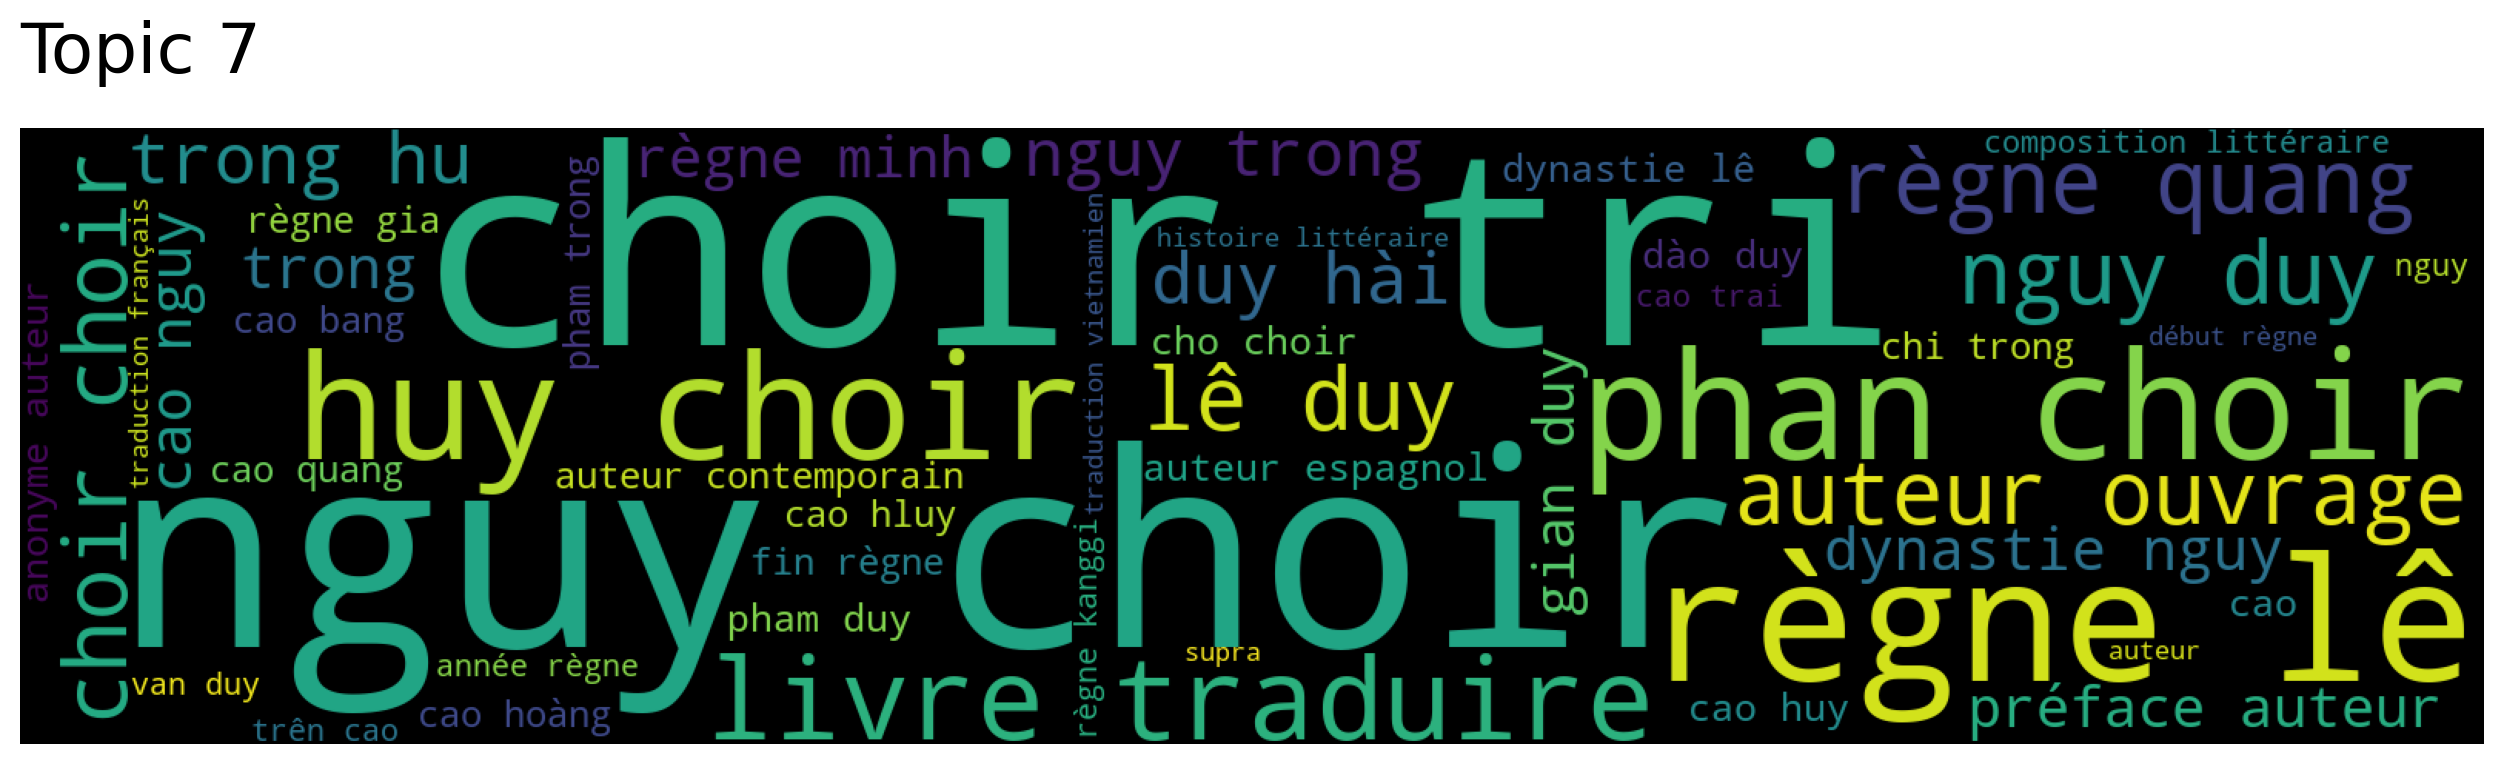

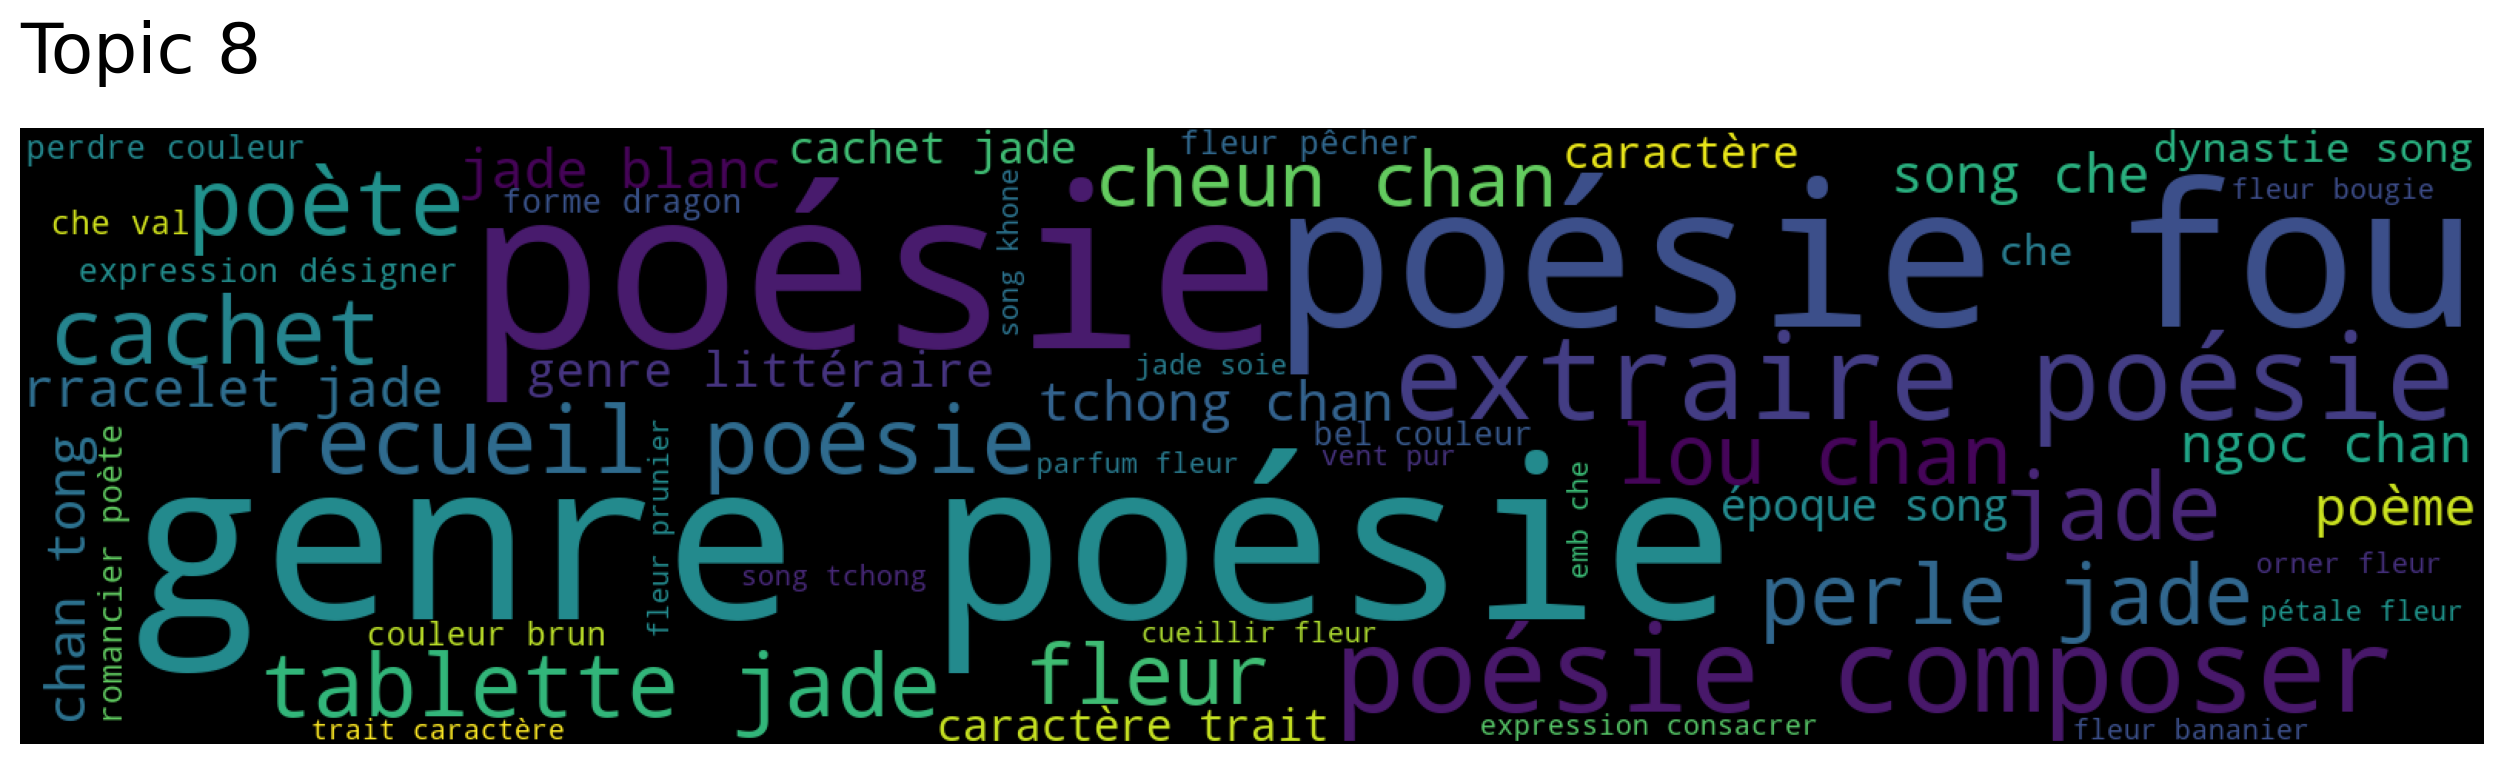

In [43]:
for i in range(model.get_num_topics()):
    model.generate_topic_wordcloud(i)

In [109]:
model50.get_topics()

(array([['culturel', 'activité', 'national', 'bibliothèque',
         'publication', 'lecteur', 'publier', 'indochinois', 'historique',
         'œuvre', 'université', 'conférence', 'ecole', 'intéresser',
         'personnalité', 'intellectuel', 'chercheur', 'unesco',
         'littérature', 'littéraire', 'documentation', 'collaboration',
         'savant', 'ouvrage', 'collection', 'étude', 'education',
         'organisation', 'etude', 'société', 'franço', 'signalon',
         'désintéresser', 'passé', 'frangais', 'programme', 'professeur',
         'pétru', 'économique', 'compréhension', 'commission',
         'organiser', 'français', 'problème', 'érudit', 'éditer',
         'institut', 'indochine', 'revue', 'orient'],
        ['sec', 'graine', 'sol', 'acide', 'liquide', 'centimètre',
         'préparation', 'humidité', 'tige', 'rendement', 'quantité',
         'feuille', 'azote', 'insecte', 'eau', 'récolte', 'sécher',
         'fermentation', 'couche', 'température', 'humide', 'arbr

In [32]:
from top2vec import Top2Vec
import multiprocessing
# Initialize Top2Vec model
model800 = Top2Vec(documents=preprocessed_corpus, 
                tokenizer=lambda x: x.split(), 
                min_count=800,
                speed='deep-learn',
                workers=(multiprocessing.cpu_count())
               )

# Access the topics (no hierarchical reduction)
model800.get_topics()

2023-09-09 21:20:29,110 - top2vec - INFO - Pre-processing documents for training
2023-09-09 21:20:29,337 - top2vec - INFO - Creating joint document/word embedding
2023-09-09 21:29:36,077 - top2vec - INFO - Creating lower dimension embedding of documents
2023-09-09 21:29:38,101 - top2vec - INFO - Finding dense areas of documents
2023-09-09 21:29:38,119 - top2vec - INFO - Finding topics


(array([['arbre', 'mètre', 'monument', 'siècle', 'petit', 'forêt',
         'bambou', 'soleil', 'cambodgien', 'eau', 'bois', 'sol',
         'élément', 'riz', 'terre', 'large', 'ère', 'pierre', 'pièce',
         'travail', 'région', 'presque', 'noir', 'village', 'khmer',
         'cham', '.', 'retrouver', 'date', 'indigène', 'fer', 'nord',
         'annamite', 'connaître', 'pied', 'génie', 'représenter', 'haute',
         'art', 'endroit', 'air', 'fig', 'temple', 'culture', 'chant',
         'pagode', 'voisin', 'colonie', 'étendre', 'influence'],
        ['société', 'comité', 'indochinois', 'etude', 'science',
         'colonie', 'membre', 'orient', 'extrême', '.', 'publier',
         'revue', 'français', 'national', 'œuvre', 'connaissance',
         'france', 'travail', 'ouvrage', 'étude', 'indochine', 'intérêt',
         'histoire', 'cochinchine', 'public', 'pari', 'saigon', 'asie',
         'historique', 'administration', 'viet', 'recherche', 'occasion',
         'commerce', 'compag

In [ ]:
from top2vec import Top2Vec
import multiprocessing
# Initialize Top2Vec model
model20dl = Top2Vec(documents=preprocessed_corpus, 
                tokenizer=lambda x: x.split(), 
                min_count=20,
                speed='deep-learn',
                workers=(multiprocessing.cpu_count()-2)
               )

# Access the topics (no hierarchical reduction)
model20dl.save('topic_20_deeplearn')

2023-09-10 17:23:11,903 - top2vec - INFO - Pre-processing documents for training
2023-09-10 17:23:12,103 - top2vec - INFO - Creating joint document/word embedding


In [171]:
model20dl.get_topic_sizes()

(array([690,  89]), array([0, 1]))

In [137]:
model800.similar_words(['science'],20)

(array(['asie', 'étude', 'orient', 'recherche', 'extrême', 'histoire',
        'national', 'culture', 'publier', 'revue', 'etude', 'oriental',
        'ouvrage', 'pari', 'connaissance', 'langue', 'société',
        'indochine', 'auteur', 'œuvre'], dtype='<U12'),
 array([0.58155929, 0.51817769, 0.5031751 , 0.49630652, 0.49193034,
        0.47076746, 0.46646175, 0.44207666, 0.42817395, 0.42715721,
        0.41437388, 0.40534233, 0.40432233, 0.40220841, 0.39025678,
        0.38620537, 0.37201461, 0.36915831, 0.36795442, 0.36214226]))

In [138]:
model400.similar_words(['science'],20)

(array(['asie', 'orient', 'occidental', 'étude', 'recherche',
        'civilisation', 'humain', 'technique', 'extrême', 'connaissance',
        'pari', 'médecine', 'europe', 'revue', 'problème', 'domaine',
        'histoire', 'culture', 'asiatique', 'oriental'], dtype='<U12'),
 array([0.55973162, 0.54822696, 0.53675764, 0.53512582, 0.49902874,
        0.49732989, 0.48933259, 0.48579566, 0.47482172, 0.47112897,
        0.4689757 , 0.44463362, 0.44085193, 0.43973886, 0.43444771,
        0.42486058, 0.42444909, 0.42006024, 0.41549387, 0.40558391]))

In [154]:

from gensim.models import Word2Vec

modelw2v = Word2Vec.load("word2vec_1000_7_100")
similar_words_w2v = modelw2v.wv.most_similar('science', topn=20)
ww=[]
sc = []
for w in similar_words_w2v:
    ww.append(w[0])
    sc.append(w[1])
print(ww)
print(sc)

['scientifique', 'international', 'asie', 'médecine', 'intellectuel', 'savant', 'congrès', 'revue', 'thèse', 'collaboration', 'progrès', 'médical', 'problème', 'académie', 'géographie', 'bibliographie', 'moderne', 'conception', 'culturel', 'institut']
[0.8238404393196106, 0.8016480207443237, 0.7789492011070251, 0.7477969527244568, 0.7361215949058533, 0.7360131144523621, 0.7338538765907288, 0.7333134412765503, 0.7247250080108643, 0.7184633612632751, 0.7064042091369629, 0.700188398361206, 0.6919510960578918, 0.6899461150169373, 0.6850849986076355, 0.6821042895317078, 0.6812252402305603, 0.6804401278495789, 0.6782612204551697, 0.6751709580421448]


In [161]:
num_doc = 20
model = Top2Vec.load('topic_10')
# [search_doc,search_score, search_doc_ID] = model.search_documents_by_keywords(model.similar_words(['science'],20)[0],num_doc)
# for id,score in zip(search_doc_ID, search_score):
#     print(score, ";" ,id, ";" ,data[id]["FolderName"])
[search_doc,search_score, search_doc_ID] = model.search_documents_by_keywords(ww,num_doc)
for id,score in zip(search_doc_ID, search_score):
    print(score, ";" ,id, ";" ,data[id]["FolderName"])

TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

In [163]:
model.get_topics()

(array([['culturel', 'activité', 'national', 'bibliothèque',
         'publication', 'lecteur', 'publier', 'indochinois', 'historique',
         'œuvre', 'université', 'conférence', 'ecole', 'intéresser',
         'personnalité', 'intellectuel', 'chercheur', 'unesco',
         'littérature', 'littéraire', 'documentation', 'collaboration',
         'savant', 'ouvrage', 'collection', 'étude', 'education',
         'organisation', 'etude', 'société', 'franço', 'signalon',
         'désintéresser', 'passé', 'frangais', 'programme', 'professeur',
         'pétru', 'économique', 'compréhension', 'commission',
         'organiser', 'français', 'problème', 'érudit', 'éditer',
         'institut', 'indochine', 'revue', 'orient'],
        ['sec', 'graine', 'sol', 'acide', 'liquide', 'centimètre',
         'préparation', 'humidité', 'tige', 'rendement', 'quantité',
         'feuille', 'azote', 'insecte', 'eau', 'récolte', 'sécher',
         'fermentation', 'couche', 'température', 'humide', 'arbr

In [124]:
# first analyse on topics size and keywords
# Print the topic sizes

model = model3200

for topic_id, size in enumerate(model.topic_sizes):
    print(f"Topic {topic_id + 1}: {size} documents")
    
topics = model.get_topics()
nb_topic = model.get_num_topics()
from collections import Counter
for i in range(nb_topic):
    # Sample list of topic keywords (replace with your actual keywords)
    print('---------------------')
    topic_keywords = topics[0][i]

    # Create a Counter to count keyword frequencies
    keyword_counter = Counter()
    
    corpus_topic = []
    #recalculate corpus for uniquely topics i
    related_docs,scores,doc_id =  model.search_documents_by_topic(i,model.get_topic_sizes()[0][i])
    corpus_topic = related_docs.tolist()

    # Iterate through the corpus and count keyword frequencies
    for document in corpus_topic:
        # Tokenize the document (you may need more advanced text processing)
        words = document.lower().split()  # Assuming simple space-based tokenization

        # Count keyword frequencies in the document
        keyword_counter.update([word for word in words if word in topic_keywords])

    # # Print the keyword frequencies
    # for keyword, frequency in keyword_counter.items():
    #     print(f"{keyword} : {frequency} times")

    for word, frequency in keyword_counter.most_common(20):
        print(f"{word}: {frequency}")
        

Topic 1: 191 documents
Topic 2: 133 documents
Topic 3: 109 documents
Topic 4: 108 documents
Topic 5: 98 documents
Topic 6: 72 documents
Topic 7: 68 documents
---------------------
grand: 3368
faire: 3282
bien: 3160
homme: 2700
trouver: 2160
voir: 2004
petit: 1952
venir: 1951
jour: 1788
prendre: 1778
pouvoir: 1694
donner: 1510
long: 1436
nom: 1292
non: 1291
aller: 1280
vouloir: 1218
falloir: 1216
mettre: 1216
devoir: 1163
---------------------
faire: 962
grand: 872
année: 830
bien: 712
français: 620
jour: 579
mois: 570
général: 568
pouvoir: 520
devoir: 443
trouver: 436
venir: 415
pays: 413
homme: 405
voir: 395
prendre: 390
temps: 379
donner: 376
nom: 350
savoir: 329
---------------------
nguy: 2323
nam: 2278
saigon: 1257
grand: 1225
voir: 1053
chinois: 1026
nom: 1008
année: 971
faire: 868
long: 755
bien: 739
ancien: 694
pays: 689
français: 620
mois: 613
général: 608
partie: 559
chine: 553
donner: 534
devoir: 532
---------------------
chinois: 2055
chine: 1438
grand: 1094
pays: 881
faire

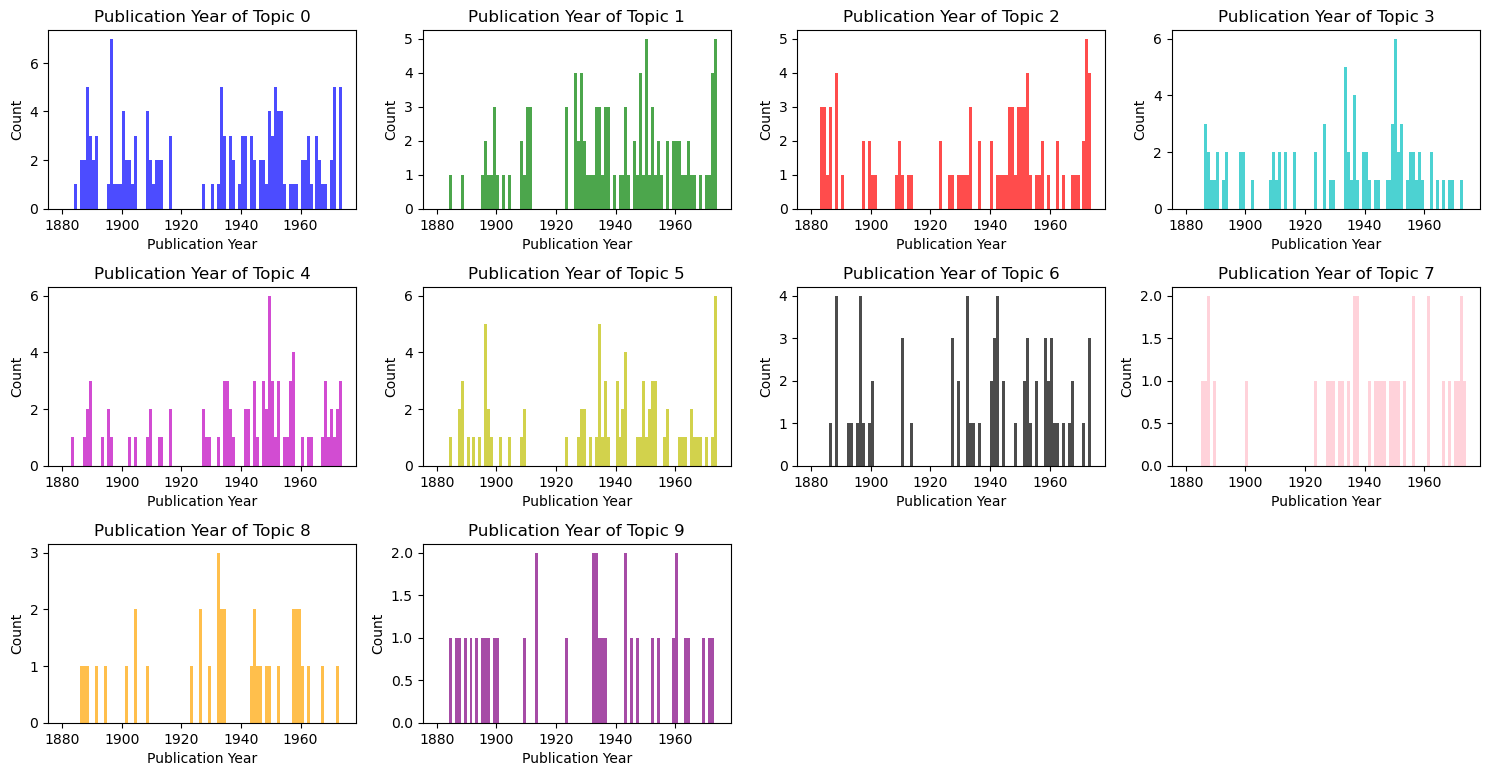

In [130]:
# distribution of topics over years plot
import json

# # Specify the path to your JSON file
# json_file_path = 'output_cleaned_lemma_final.json'  # Replace with the actual path to your JSON file

# # Load the JSON data from the file
# with open(json_file_path, 'r', encoding='utf-8') as json_file:
#     data_clean_lemma = json.load(json_file)
    
years = []
model=model400
nb_topic = model.get_num_topics()
for t in range(nb_topic):
    year=[]
    dd,ss,ii= model.search_documents_by_topic(t,model.get_topic_sizes()[0][t])
    for i in ii:
        year.append(data[i]['LatestYear'])
    years.append(year)

# Create a list of colors for the histograms (optional)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple', 'gray', 'brown','cyan','magenta']

# Create a subplot with 12 subplots (one for each type of document)
plt.figure(figsize=(15, 10))

for i in range(nb_topic):
    plt.subplot(4, 4, i + 1)
    plt.hist(years[i], bins=np.arange(1880, 1975, 1), color=colors[i], alpha=0.7)
    plt.title("Publication Year of Topic {}".format(i))
    plt.xlabel('Publication Year')
    plt.ylabel('Count')

plt.tight_layout()
plt.savefig("Distribution over time of Topics.png")
plt.show()

In [125]:
# analyze related doc: plot distance keywords by cosine heat map
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compare_keyword(doc_id,topic_id,other_topic_id):
    topic_keywords = topic_info[other_topic_id]['Keywords'] 
    document_top_words = list(topic_info[topic_id]['DocumentInfo'][doc_id]['TopWords'].keys())
    # Join the words in each list to create sentences
    sentence1 = ' '.join(document_top_words)
    sentence2 = ' '.join(topic_keywords)

    # Create a CountVectorizer or TF-IDF Vectorizer instance
    vectorizer = TfidfVectorizer()  # You can also use CountVectorizer()

    # Fit and transform the vectorizer on your sentences
    tfidf_matrix = vectorizer.fit_transform([sentence1, sentence2])

    # Compute the cosine similarity between the vectors
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    return cosine_sim[0][0]
#     print("Cosine Similarity:", cosine_sim[0][0])
        
# Example data (replace with your actual data)
nb_doc = 20
nb_topic = model.get_num_topics()

# Create a heatmap
def heatmap_doc_topic(topic_id):
    plt.imshow(distances_data, cmap='YlGnBu', aspect='auto')
    plt.colorbar(label='Distance')
    plt.xlabel('Topic')
    plt.ylabel('Document')
    plt.title('Document-Topic Distances Heatmap of Topic {}'.format(topic_id))
    plt.xticks(range(nb_topic))
    plt.yticks(range(nb_doc))# Save the plot to a PNG file
    plt.savefig('Document-Topic Distances Heatmap of Topic {}.png'.format(topic_id))
    plt.show()
    
distances_data = np.zeros((nb_doc, nb_topic))
for topic_id in range(nb_topic):
    for i in range(nb_doc):
        for j in range(nb_topic):
            distances_data[i][j] = compare_keyword(i,topic_id,j)
    heatmap_doc_topic(topic_id)

KeyError: 15

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data (replace with your own data)
heatmap_data_list = [np.zeros((nb_doc, nb_topic)) for _ in range(nb_topic)]

# Create a figure with 3 rows and 4 columns of subplots
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate through the heatmap_data_list and create a subplot for each heatmap
for i, heatmap_data in enumerate(heatmap_data_list):
    
    row = i // num_cols
    col = i % num_cols
    for ii in range(nb_doc):
        for jj in range(nb_topic):
            heatmap_data[ii][jj] = compare_keyword(ii,i,jj)
    # Plot the heatmap in the current subplot
    
    if(i<nb_topic):
        im = axes[row, col].imshow(heatmap_data, cmap='viridis')
        axes[row, col].set_title('Document-Topic Distances Topic {}.png'.format(i))
        plt.colorbar(im, ax=axes[row, col])
    
# Adjust spacing between subplots
plt.tight_layout()

# Save the figure containing all subplots
plt.savefig("heatmap_subplots.png")
plt.show()

In [6]:
# analyze similar words, find topic/doc by keywords

In [7]:
# visualization : wordcloud of topic
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

nb_topic = model.get_num_topics()
nb_doc = nb_doc_related

# Define a function to create a word cloud from a list of documents
def create_word_cloud(documents, topic_name):
    
    text = " ".join(documents)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(f"Word Cloud for Topic {topic_name}")
#     plt.savefig(f"Word Cloud for Topic {topic_name}.png")
#     plt.axis('off')
#     plt.show()
    return wordcloud

# for topic_id in range(nb_topic):
#     text = []
#     for doc_id in topic_info[topic_id]['RelatedDocumentsID']:
#         text = text + [corpus[doc_id]]
#     create_word_cloud(text, topic_id)

# for i in range(model.get_num_topics()):
#     model.generate_topic_wordcloud(i)
#     plt.savefig("wordcloud topic {} .png".format(i))
    
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a function model.generate_topic_wordcloud(i) that generates word clouds
# Create a figure with 9 subplots in a single column
fig, axs = plt.subplots(9, 1, figsize=(6, 12))

# Generate and plot word clouds for topics 1 to 9
for i in range(9):
    
    text = []
    for doc_id in topic_info[i]['RelatedDocumentsID']:
        text = text + [corpus[i]]
    wordcloud = create_word_cloud(text, i)
    axs[i-1].imshow(wordcloud, interpolation='bilinear')
    axs[i-1].set_title(f'Topic {i} Word Cloud')
    axs[i-1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



/tmp/ipykernel_4225/3682620173.py:48: UserWarning: The palette list has more values (256) than needed (7), which may not be intended.
  sns.scatterplot(data=umap_df, x='x', y='y', hue='topic', palette=custom_palette)


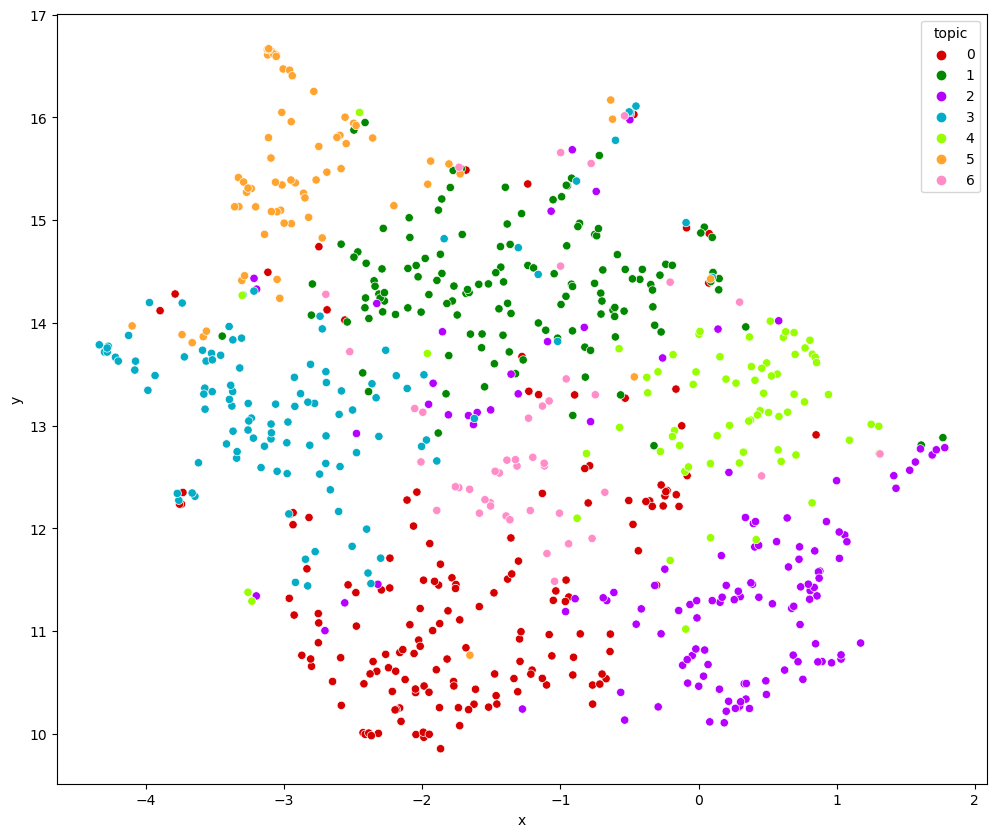

In [4]:
# umap

import colorcet as cc
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from top2vec import Top2Vec

myt2v = Top2Vec.load('model_10_fast-learn')
myt2v.document_ids
# reduction = 11
exceptions = []
kwargs = None

topic_names = ["Topic{}".format(i) for i in range(myt2v.get_num_topics())]

# t2v.hierarchical_topic_reduction(reduction)

relevant_ids = [doc_id for doc_id, top in
                zip(myt2v.document_ids, myt2v.get_documents_topics(myt2v.document_ids, reduced=False)[0])
                if top not in exceptions]
relevant_vectors = [vec for vec, top in
                    zip(myt2v.document_vectors, myt2v.get_documents_topics(myt2v.document_ids, reduced=False)[0])
                    if top not in exceptions]

topic_vector_df = pd.DataFrame(index=relevant_ids, columns=range(1,301),
                               data=relevant_vectors)

reducer = umap.UMAP()
umapped = reducer.fit_transform(topic_vector_df)

umap_df = pd.DataFrame(umapped, columns=['x', 'y'])
main_topics = myt2v.get_documents_topics(relevant_ids, reduced=False)[0]
umap_df['topic'] = main_topics
umap_df = umap_df.sort_values(by='topic')
if topic_names:
    umap_df['topic'].replace(topic_names, inplace=True)

plt.figure(figsize=(12, 10))
# sns.scatterplot(data=umap_df, x='x', y='y', hue='topic',
#         palette=sns.color_palette(cc.glasbey_light, n_colors=len(umap_df.topic.unique())))

# Assuming cc.glasbey_light is your list of color codes
custom_palette = sns.color_palette(cc.glasbey_light)

# Now you can use the custom_palette in your Seaborn plots
sns.scatterplot(data=umap_df, x='x', y='y', hue='topic', palette=custom_palette)
plt.savefig('Spatial distribution by UMAP projection', bbox_inches='tight')
plt.show()

# plt.legend(ncol=2, markerscale=2, fontsize=14)
# plt.grid(False)
# plt.xlabel(None)
# plt.ylabel(None)
# plt.gca().yaxis.set_ticklabels([])
# plt.gca().xaxis.set_ticklabels([])

# plt.show()

In [9]:
myt2v = Top2Vec.load('model_ngram_10_deep-learn-filter2')
myt2v.get_topic_sizes()

(array([158, 118, 116,  93,  91,  85,  64]), array([0, 1, 2, 3, 4, 5, 6]))

In [10]:

myt2v.get_topics()

(array([['société', 'conférence', 'étude', 'indochinois', 'savant',
         'bulletin ecole', 'national', 'université', 'orient',
         'revue indochinois', 'activité', 'comité', 'publication',
         'bulletin', 'institut', 'science', 'ecole', 'publier',
         'société savant', 'conférence public', 'publier bulletin',
         'société indochinois', 'membre société', 'bulletin société',
         'président', 'culturel', 'exposition', 'congrès',
         'publication ecole', 'directeur institut',
         'archéologie indochinois', 'rulletin', 'cinquantenaire',
         'colonial', 'france', 'directeur', 'scientifique', 'collection',
         'géographie', 'académie', 'organisation', 'membre',
         'rulletin ecole', 'international', 'conférence faire',
         'indochine', 'congrès société', 'publication bulletin',
         'ecole national', 'extrême'],
        ['amiral', 'marine', 'expédition', 'colonie', 'conquête',
         'établissement', 'occupation', 'france', 'fré

In [11]:
#plot mot-cle frequence occurence pendant le temps
kw2 = myt2v.get_topics()[0][2]

In [15]:
list_kw2 = (kw2.tolist())

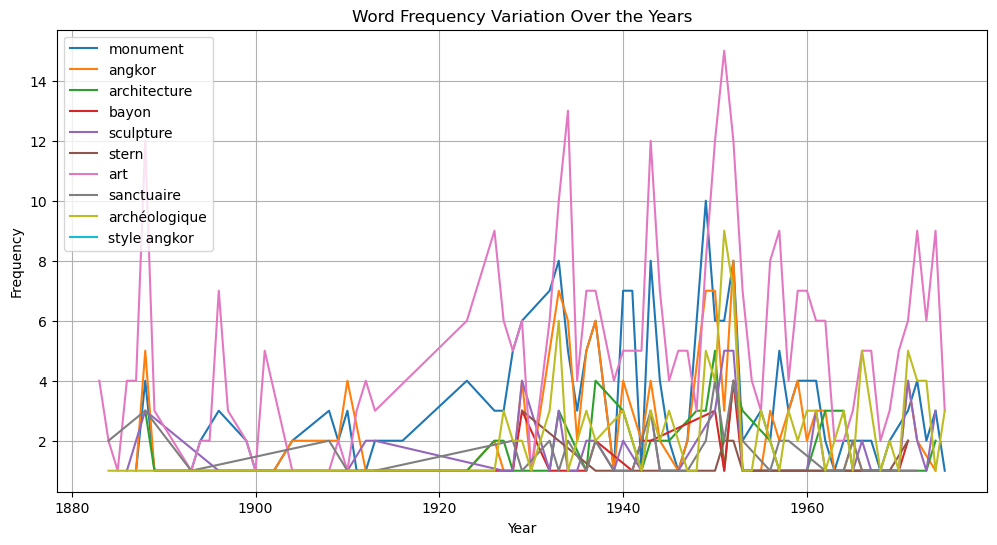

In [59]:
import json
# Load the dictionary containing filenames and titles from the JSON file
with open('data_final_stopword_lemma.json', 'r') as json_file:
    data = json.load(json_file)

word_list = myt2v.get_topics()[0][2][:10]
# word_list = ["nguyen", "thi", "van"]

from collections import defaultdict

word_freq_by_year = defaultdict(lambda: defaultdict(int))

for entry in data[:-1]:
#     print(entry["FolderName"])
    year = entry["LatestYear"]
    text = entry["TextData"].lower()  # Convert to lowercase for case-insensitive counting
    words = text.split()
    
    for word in word_list:
#         print(word)
        if word in words:
            word_freq_by_year[word][year] += 1
#         print(f'word_freq_by_year[{word}][{year}]',word_freq_by_year[word][year])
import matplotlib.pyplot as plt

# Create a dictionary to store the data for plotting
plot_data = {word: {"years": [], "frequencies": []} for word in word_list}

for word, year_freqs in word_freq_by_year.items():
    years = sorted(year_freqs.keys())
    frequencies = [year_freqs[year] for year in years]
    
    plot_data[word]["years"] = years
    plot_data[word]["frequencies"] = frequencies

    
plt.figure(figsize=(12, 6))

for word, data in plot_data.items():
    plt.plot(data["years"], data["frequencies"], label=word)

plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Word Frequency Variation Over the Years")
plt.legend()
plt.grid(True)
plt.show()


In [62]:
data

{'years': [], 'frequencies': []}

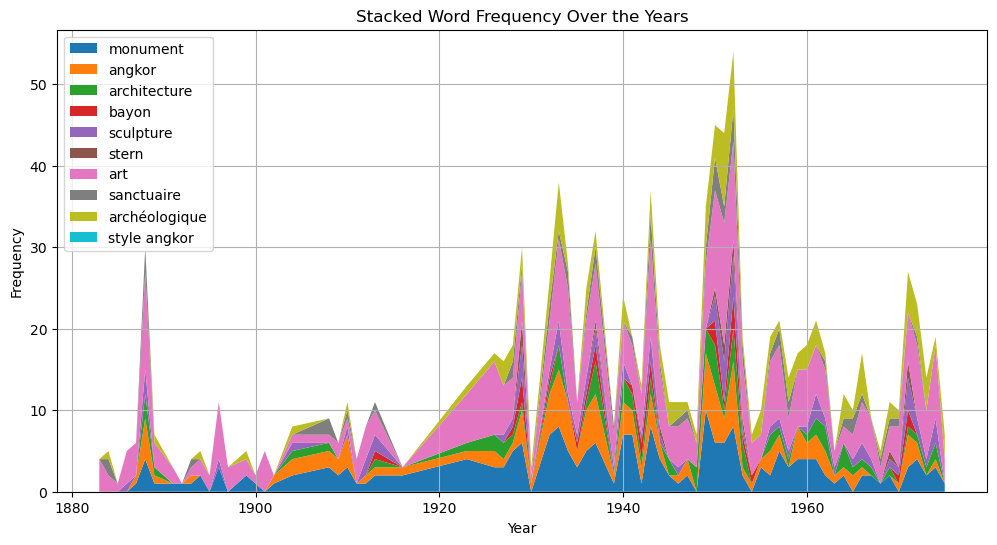

In [65]:
with open('data_final_stopword_lemma.json', 'r') as json_file:
    data = json.load(json_file)


import matplotlib.pyplot as plt
import numpy as np

# Initialize an empty dictionary to store word frequencies by year
word_freq_by_year = {}

# Count word frequencies by year for the combined word list
for entry in data[:-1]:
#     print(year)
    year = entry["LatestYear"]
    text = entry["TextData"].lower()
    words = text.split()
    
    for word in word_list:
        if word in words :
            if year not in word_freq_by_year:
                word_freq_by_year[year] = {word: 1}
            else:
                if word in word_freq_by_year[year]:
                    word_freq_by_year[year][word] += 1
                else:
                    word_freq_by_year[year][word] = 1

# Prepare data for stacked plot
years = sorted(word_freq_by_year.keys())
stacked_data = []

for word in word_list:
    freq_list = [word_freq_by_year.get(year, {}).get(word, 0) for year in years]
    stacked_data.append(freq_list)

# Create a stacked plot
plt.figure(figsize=(12, 6))
plt.stackplot(years, stacked_data, labels=word_list)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Stacked Word Frequency Over the Years")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


['savant', 'catholique', 'unesco', 'indien', 'institut', 'asiatique', 'histoire', 'américain', 'occident', 'historien', 'agriculture', 'asie', 'pensée', 'bouddhisme', 'intéresser', 'asi', 'labrusse', 'bibliothèqu', 'japon', 'médecine', 'paul', 'lapon', 'collaboration', 'archéologie', 'université', 'uni', 'congrès', 'ndochine', 'moderne', 'curiosité', 'museum', 'occider', 'humain', 'paria', 'renaître', 'bibliographie', 'illustrer', 'national', 'perspective', 'social', 'académie', 'spécialiste', 'géographie', 'union', 'georges', 'indochine', 'revue', 'exposé', 'amérique', 'monde', 'frangais', 'doctrine', 'rome', 'association', 'huard', 'teilhard', 'lndochine', 'pari', 'enrichir', 'documentation', 'médical', 'manuel', 'résumer', 'romain', 'trimestriel']
['religieux', 'morale', 'change', 'science', 'spirituel', 'tendance', 'monarchie', 'mœur', 'influence', 'vocabulaire', 'rattacher', 'personnalité', 'purement', 'application', 'formation', 'organisme', 'baser', 'manifestation', 'pratique', 

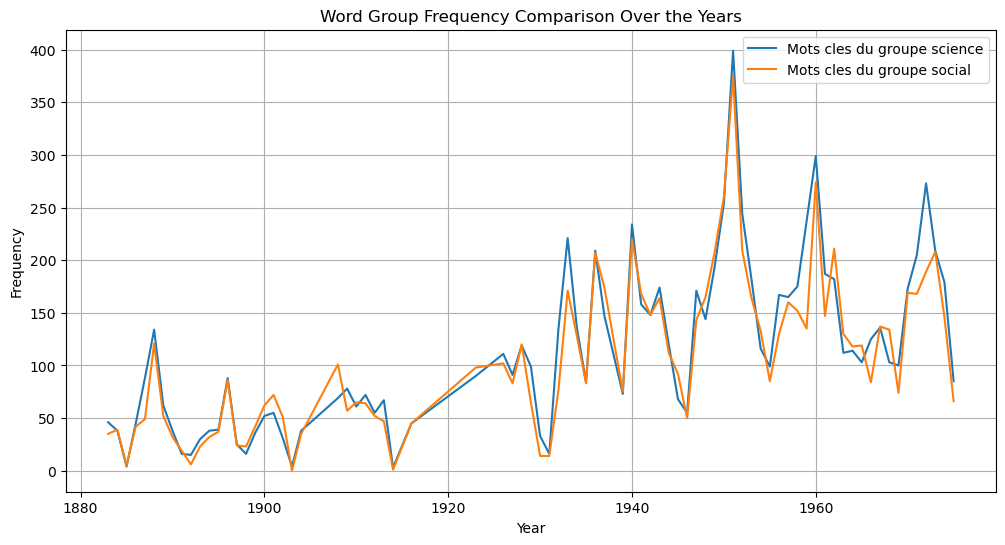

In [106]:
import matplotlib.pyplot as plt
from collections import defaultdict

with open('data_final_stopword_lemma.json', 'r') as json_file:
    data = json.load(json_file)

from gensim.models import Word2Vec
modelw2v = Word2Vec.load("word2vec_1000_5_100")
keyword1 = 'science'
similar1 = modelw2v.wv.most_similar(keyword1, topn=100)
word_list1=[]
for w,c in similar1:
    word_list1.append(w)

keyword2 = 'social'
similar2 = modelw2v.wv.most_similar(keyword2, topn=100)
word_list2=[]
for w,c in similar2:
    word_list2.append(w)


# Convert the lists to sets for efficient set operations
set1 = set(word_list1)
set2 = set(word_list2)

# Find the words that are unique to each list
unique_to_list1 = set1 - set2
unique_to_list2 = set2 - set1

# Convert the results back to lists if needed
word_list1 = list(unique_to_list1)
word_list2 = list(unique_to_list2)

# Count word frequencies by year for each word list
word_freq_by_year1 = defaultdict(int)
word_freq_by_year2 = defaultdict(int)

print(word_list1)
print(word_list2)

for entry in data[:-1]:
    year = entry["LatestYear"]
    text = entry["TextData"].lower()
    words = text.split()
    
    for word in word_list1 :
        if word in words:
            word_freq_by_year1[year] += 1
    for word in word_list2:
        if word in words:
            word_freq_by_year2[year] += 1

    

# Prepare data for plotting
years = sorted(set(word_freq_by_year1.keys()) | set(word_freq_by_year2.keys()))
freq_list1 = [word_freq_by_year1.get(year, 0) for year in years]
freq_list2 = [word_freq_by_year2.get(year, 0) for year in years]

# Plot the data
plt.figure(figsize=(12, 6))

plt.plot(years, freq_list1, label=f"Mots cles du groupe {keyword1}")
plt.plot(years, freq_list2, label=f"Mots cles du groupe {keyword2}")

plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Word Group Frequency Comparison Over the Years")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def topics_stackplot(topic_df, main_df, exceptions, relative='local', timerange=range(1802,1889),
                     rolling=True, savepath=None, legend_pos='upper left'):

    topic_df = topic_df.loc[~topic_df['main_topic'].isin(exceptions)]
    
    matplotlib.rcParams['font.family'] = 'georgia'
    plt.figure(figsize=(15,7))
    
    local_articles = topic_df[(topic_df.year >= timerange[0]) &
                              (topic_df.year < timerange[-1])].groupby('year')['year'].count()
    
    total_articles = main_df[(main_df.year >= timerange[0]) &
                              (main_df.year < timerange[-1])].groupby('year')['year'].count()
    
    topics = sorted(topic_df['main_topic'].unique())
    data = []
    for top in topics:
        topic_counts = topic_df[topic_df['main_topic'] == top].groupby('year')['main_topic'].count().reindex(timerange)
        if relative == 'local':
            data.append((topic_counts/local_articles).fillna(0).rolling(5, min_periods=1).mean())
        elif relative == 'global':
            data.append((topic_counts/total_articles).fillna(0)) #.rolling(5, min_periods=1).mean())
        elif relative == None:
            data.append((topic_counts).fillna(0))
        else:
            return('Pick "local", "global" or None for parameter "relative"')
            
    #plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Pastel1.colors)
    #col = sns.color_palette("tab20", len(topics))
    palette = sns.color_palette(cc.glasbey, n_colors=len(topics))
    plt.stackplot(timerange, data, labels=topics, colors=palette)
        
    plt.grid(b=True, which='both')
    plt.xticks(ticks=timerange, labels=[str(i) if i%5==0 else '' for i in timerange], fontsize=14)
    plt.tick_params(axis ='x', rotation = 45)
    if relative:
        plt.ylabel('% de tous les articles', fontsize=20)
    else:
        plt.ylabel("nb d'articles", fontsize=20)
    plt.yticks(fontsize=14)

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], [topic_names[int(label)] for label in labels[::-1]], fontsize=12, loc=legend_pos, ncol=4)
    sns.set_style('ticks')
    
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    
    plt.show()

In [ ]:
def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

def conceptual_scatterplot2():
    
    labels = [name for key, name in topic_names.items() if key not in exceptions]
    data = np.array(list(topic_coords.values()))
    sizes = [t2v.get_topic_sizes(reduced=True)[0][topic] for topic in topic_names.keys() if topic not in exceptions]
    
    conceptual_df = pd.DataFrame(index=labels, data=data, columns=['x', 'y'])
    conceptual_df['size'] = sizes
    conceptual_df['x'] = jitter(conceptual_df['x'], 0.3)
    conceptual_df['y'] = jitter(conceptual_df['y'], 0.3)
    
    palette = sns.color_palette([topic_colormap[topic] for topic in topic_colormap.keys()
                                            if topic_names[topic] in labels])
    
    #return conceptual_df
    
    plt.figure(figsize=(6,6))
    
    plt.arrow(x=-4, y=0, dx=8, dy=0, color='black', head_width=0.2)
    plt.arrow(x=4, y=0, dx=-8, dy=0, color='black', head_width=0.2)
    plt.arrow(x=0, y=-4, dx=0, dy=8, color='black', head_width=0.2)
    plt.arrow(x=0, y=4, dx=0, dy=-8, color='black', head_width=0.2)
    
    sns.scatterplot(data=conceptual_df, x='x', y='y', size='size',
                    hue=conceptual_df.index, x_jitter=100, y_jitter=100, palette=palette, sizes=(600,1200))
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    
    for ix, row in conceptual_df.iterrows():
        if ix == 'télégrammes':
            plt.annotate(ix, (row.x, row.y-0.4), ha='right', size=14)
        elif ix == 'récolte':
            plt.annotate(ix, (row.x-0.3, row.y-0.3), ha='right', size=14)
        elif ix == 'commerce':
            plt.annotate(ix, (row.x-0.2, row.y), ha='right', size=14)
        elif ix == 'festivités':
            plt.annotate(ix, (row.x+0.3, row.y+0.3), ha='right', size=14)
        elif ix == 'tempête-grêle':
            plt.annotate(ix, (row.x-0.3, row.y+0.2), size=14)
        elif ix == 'navigation':
            plt.annotate(ix, (row.x, row.y+0.3), size=14)
        elif ix == 'foudre-incendie':
            plt.annotate(ix, (row.x+0.5, row.y+0.3), ha='right', size=14)
        elif ix == 'chimie-végétation':
            plt.annotate(ix, (row.x+0.3, row.y+0.4), ha='right', size=14)
        else:
            plt.annotate(ix, (row.x+0.1, row.y+0.2), size=14)
    
    plt.annotate('institutionnel', (3, -0.5), ha='center', size=14)
    plt.annotate('personnel', (-4, -0.5), ha='center', size=14)
    plt.annotate('descriptif', (0.5, -4.2), ha='center', size=14, rotation=90)
    plt.annotate('instrumental', (0.5, 2), ha='center', size=14, rotation=90)
    
    plt.axis('off')
    plt.gca().get_legend().remove()
    
    #plt.savefig('../references/memoire/images/conceptual_scatterplot2.pdf', bbox_inches='tight')
    
    plt.show
    
conceptual_scatterplot2()